Question 1: Feature Scaling

Feature scaling is essential because many machine learning algorithms compute distances (e.g., KNN, SVM) 
or rely on gradient-based optimization (e.g., Logistic Regression, Neural Networks). 
Features with larger numeric ranges can dominate the objective function, causing models to perform poorly.

Without scaling, features on different scales cause the model to bias towards variables with larger values.

Below is a demonstration using Logistic Regression on the Iris dataset with and without scaling.

Accuracy WITHOUT feature scaling: 0.9474

Question 2: Min-Max Scaling
Accuracy WITH Min-Max scaling: 0.8684

Question 3: Standardization (Z-score Scaling)
Accuracy WITH Standardization (Z-score): 0.9211

Question 4: Robust Scaling
Accuracy WITH Robust scaling: 0.8684


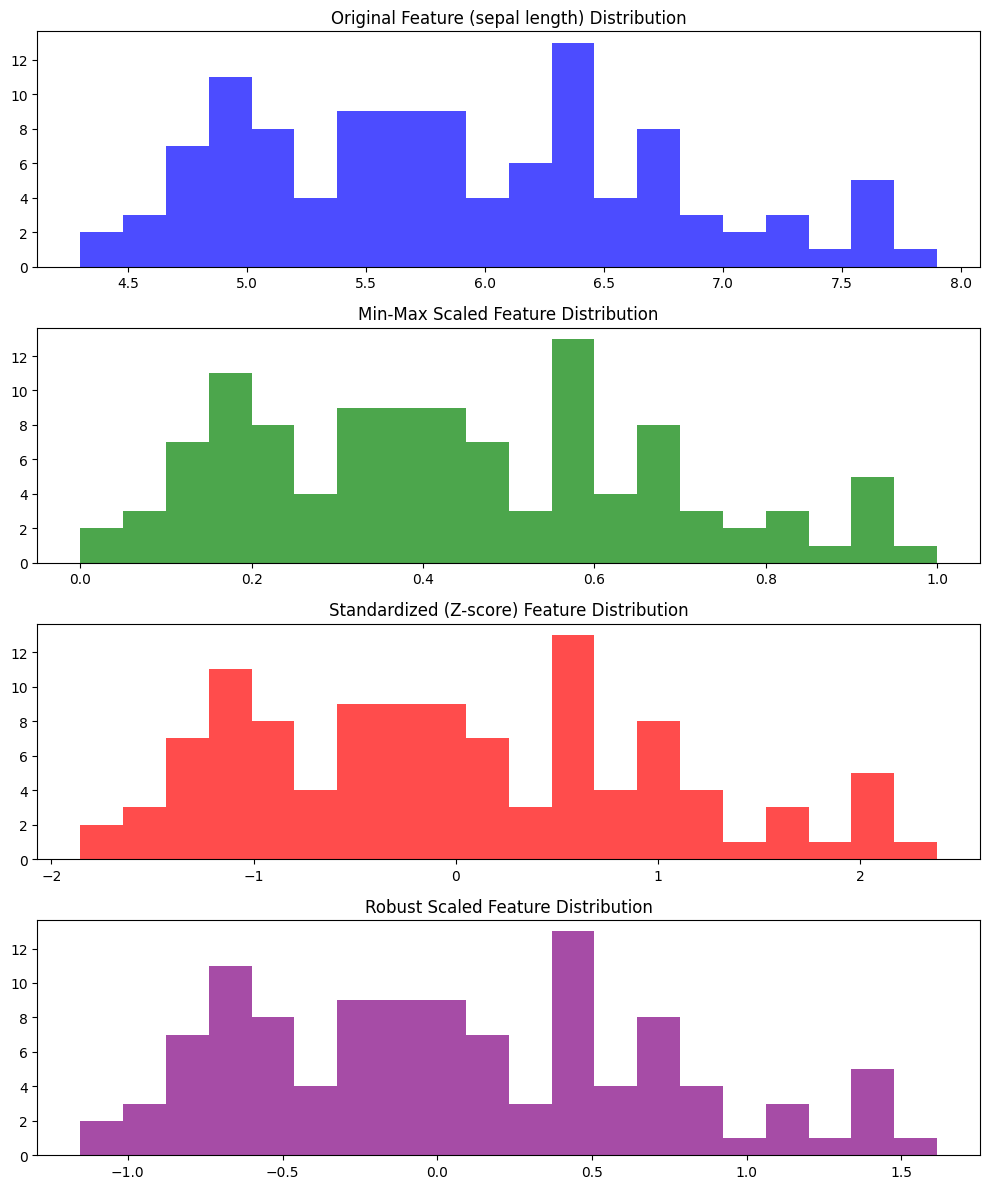

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Question 1: Feature Scaling Explanation and Demonstration
print("Question 1: Feature Scaling")
print("""
Feature scaling is essential because many machine learning algorithms compute distances (e.g., KNN, SVM) 
or rely on gradient-based optimization (e.g., Logistic Regression, Neural Networks). 
Features with larger numeric ranges can dominate the objective function, causing models to perform poorly.

Without scaling, features on different scales cause the model to bias towards variables with larger values.

Below is a demonstration using Logistic Regression on the Iris dataset with and without scaling.
""")

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Train logistic regression WITHOUT scaling
model_unscaled = LogisticRegression(max_iter=200)
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, pred_unscaled)

print(f"Accuracy WITHOUT feature scaling: {acc_unscaled:.4f}")

# Question 2: Min-Max Scaling
print("\nQuestion 2: Min-Max Scaling")
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Train logistic regression with Min-Max scaled data
model_minmax = LogisticRegression(max_iter=200)
model_minmax.fit(X_train_minmax, y_train)
pred_minmax = model_minmax.predict(X_test_minmax)
acc_minmax = accuracy_score(y_test, pred_minmax)

print(f"Accuracy WITH Min-Max scaling: {acc_minmax:.4f}")

# Question 3: Standardization (Z-score Scaling)
print("\nQuestion 3: Standardization (Z-score Scaling)")
standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

# Train logistic regression with standardized data
model_std = LogisticRegression(max_iter=200)
model_std.fit(X_train_std, y_train)
pred_std = model_std.predict(X_test_std)
acc_std = accuracy_score(y_test, pred_std)

print(f"Accuracy WITH Standardization (Z-score): {acc_std:.4f}")

# Question 4: Robust Scaling
print("\nQuestion 4: Robust Scaling")
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

# Train logistic regression with robust scaled data
model_robust = LogisticRegression(max_iter=200)
model_robust.fit(X_train_robust, y_train)
pred_robust = model_robust.predict(X_test_robust)
acc_robust = accuracy_score(y_test, pred_robust)

print(f"Accuracy WITH Robust scaling: {acc_robust:.4f}")

# Bonus: Visual comparison of feature distributions before and after scaling
feature_names = iris.feature_names

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

axs[0].hist(X_train[:, 0], bins=20, color='blue', alpha=0.7)
axs[0].set_title("Original Feature (sepal length) Distribution")

axs[1].hist(X_train_minmax[:, 0], bins=20, color='green', alpha=0.7)
axs[1].set_title("Min-Max Scaled Feature Distribution")

axs[2].hist(X_train_std[:, 0], bins=20, color='red', alpha=0.7)
axs[2].set_title("Standardized (Z-score) Feature Distribution")

axs[3].hist(X_train_robust[:, 0], bins=20, color='purple', alpha=0.7)
axs[3].set_title("Robust Scaled Feature Distribution")

plt.tight_layout()
plt.show()
